In [2]:
# Przydatne importy

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex

In [3]:
data = pd.read_csv("fires_thefts.csv", names=["x", "y"])
print(data[:10])
x = data[["x"]].to_numpy().flatten()
y = data[["y"]].to_numpy().flatten()

      x   y
0   6.2  29
1   9.5  44
2  10.5  36
3   7.7  37
4   8.6  53
5  34.1  68
6  11.0  75
7   6.9  18
8   7.3  31
9  15.1  25


In [4]:
def h(theta, x):
    return theta[0] + theta[1] * x


# Funkcje rysujące wykres kropkowy oraz prostą regresyjną
def regdots(x, y):
    fig = plt.figure(figsize=(16 * .6, 9 * .6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=50, label='Dane')

    ax.set_xlabel(u'Wielkość miejscowości [dzies. tys. mieszk.]')
    ax.set_ylabel(u'Dochód firmy [dzies. tys. dolarów]')
    ax.margins(.05, .05)
    plt.ylim(min(y) - 1, max(y) + 1)
    plt.xlim(min(x) - 1, max(x) + 1)
    return fig


def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X,
            Y,
            linewidth='2',
            label=(r'$y={theta0}{op}{theta1}x$'.format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op='+' if theta[1] >= 0 else '-')))


def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

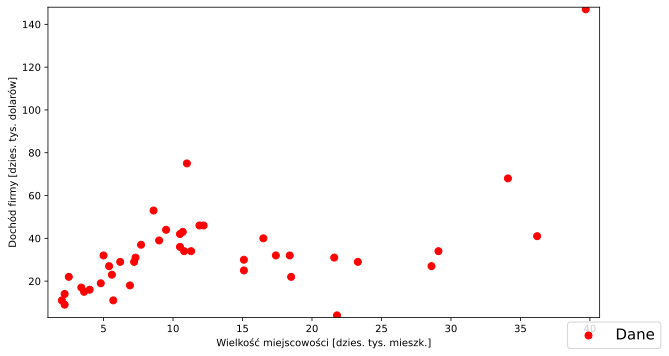

In [5]:
fig = regdots(x, y)
legend(fig)

In [6]:
def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))


def regline2(fig, fun, theta, xx, yy):
    """Rysuj regresję liniową"""
    ax = fig.axes[0]
    x0, x1 = min(xx), max(xx)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    cost = J(fun, theta, xx, yy)
    ax.plot(X,
            Y,
            linewidth="2",
            label=(r'$y={theta0}{op}{theta1}x, \; J(\theta)={cost:.3}$'.format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op='+' if theta[1] >= 0 else '-',
                cost=str(cost))))


sliderTheta02 = widgets.FloatSlider(min=-10,
                                    max=10,
                                    step=0.1,
                                    value=0,
                                    description=r'$\theta_0$',
                                    width=300)
sliderTheta12 = widgets.FloatSlider(min=-5,
                                    max=5,
                                    step=0.1,
                                    value=0,
                                    description=r'$\theta_1$',
                                    width=300)


def slide2(theta0, theta1):
    fig = regdots(x, y)
    regline2(fig, h, [theta0, theta1], x, y)
    legend(fig)

In [7]:
# Wykres funkcji kosztu dla ustalonego theta_1=1.0


def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)


def costplot(hypothesis, x, y, theta1=1.0):
    fig = plt.figure(figsize=(16 * .6, 9 * .6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$J(\theta)$')
    j = costfun(hypothesis, x, y)
    fun = lambda theta0: j([theta0, theta1])
    X = np.arange(-10, 10, 0.1)
    Y = [fun(x) for x in X]
    ax.plot(X,
            Y,
            linewidth='2',
            label=(r'$J(\theta_0, {theta1})$'.format(theta1=theta1)))
    return fig


def slide3(theta1):
    fig = costplot(h, x, y, theta1)
    legend(fig)


sliderTheta13 = widgets.FloatSlider(min=-5,
                                    max=5,
                                    step=0.1,
                                    value=1.0,
                                    description=r'$\theta_1$',
                                    width=300)
widgets.interact_manual(slide3, theta1=sliderTheta13)

interactive(children=(FloatSlider(value=1.0, description='$\\theta_1$', max=5.0, min=-5.0), Button(description…

<function __main__.slide3(theta1)>

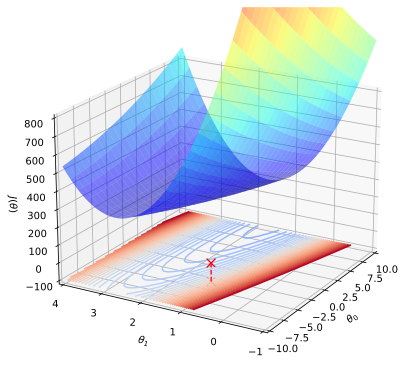

In [8]:
# Wykres funkcji kosztu względem theta_0 i theta_1

from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline


def costplot3d(hypothesis, x, y, show_gradient=False):
    fig = plt.figure(figsize=(16 * .6, 9 * .6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$J(\theta)$')

    j = lambda theta0, theta1: costfun(hypothesis, x, y)([theta0, theta1])
    X = np.arange(-10, 10.1, 0.1)
    Y = np.arange(-1, 4.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([[
        J(hypothesis, [theta0, theta1], x, y)
        for theta0, theta1 in zip(xRow, yRow)
    ] for xRow, yRow in zip(X, Y)])

    ax.plot_surface(X,
                    Y,
                    Z,
                    rstride=2,
                    cstride=8,
                    linewidth=0.5,
                    alpha=0.5,
                    cmap='jet',
                    zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(-10, 10)
    ax.set_ylim3d(-1, 4)
    ax.set_zlim3d(-100, 800)

    N = range(0, 800, 20)
    plt.contour(X, Y, Z, N, zdir='z', offset=-100, cmap='coolwarm', alpha=1)

    ax.plot([-3.89578088] * 2, [1.19303364] * 2, [-100, 4.47697137598],
            color='red',
            alpha=1,
            linewidth=1.3,
            zorder=100,
            linestyle='dashed',
            label=r'minimum: $J(-3.90, 1.19) = 4.48$')
    ax.scatter([-3.89578088] * 2, [1.19303364] * 2, [-100, 4.47697137598],
               c='r',
               s=80,
               marker='x',
               alpha=1,
               linewidth=1.3,
               zorder=100,
               label=r'minimum: $J(-3.90, 1.19) = 4.48$')

    if show_gradient:
        ax.plot([3.0, 1.1], [3.0, 2.4], [263.0, 125.0],
                color='green',
                alpha=1,
                linewidth=1.3,
                zorder=100)
        ax.scatter([3.0], [3.0], [263.0],
                   c='g',
                   s=30,
                   marker='D',
                   alpha=1,
                   linewidth=1.3,
                   zorder=100)

    ax.margins(0, 0, 0)
    fig.tight_layout()


costplot3d(h, x, y)

# Implementacja gradientu, macierze

In [9]:
# Wyświetlanie macierzy w LaTeX-u


def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx


def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost,
            theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] -
            alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1] - alpha / float(m) * sum(
                (h(theta, x[i]) - y[i]) * x[i] for i in range(m))
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if current_cost > prev_cost:
            print("Zbyt duża długość kroku!")
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        log.append([current_cost, theta])
    return theta, log

In [10]:
best_theta, log = gradient_descent(h,
                                   J, [0.0, 0.0],
                                   x,
                                   y,
                                   alpha=0.001,
                                   eps=0.0000001)

display(
    Math(r'\large\textrm{Wynik:}\quad \theta = ' +
         LatexMatrix(np.matrix(best_theta).reshape(2, 1)) +
         (r' \quad J(\theta) = %.4f' % log[-1][0]) +
         r' \quad \textrm{po %d iteracjach}' % len(log)))

<IPython.core.display.Math object>


# Wykres z linią regresji ustawioną pod wyliczone parametry theta

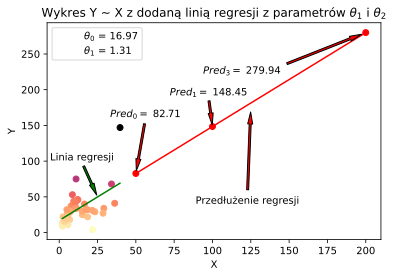

In [11]:
x_test = np.array([50, 100, 200])
y_pred = h(best_theta, x_test)

fig, ax = plt.subplots()
ax.scatter(x, y, c=1 - y, cmap="magma")
ax.plot(x, h(theta=best_theta, x=x), c="green")
ax.plot(x_test, h(theta=best_theta, x=x_test), c="red")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title(
    r"Wykres Y ~ X z dodaną linią regresji z parametrów $\theta_1$ i $\theta_2$"
)
ax.annotate("Linia regresji",
            xy=(25, 50),
            xycoords='data',
            xytext=(0.2, 0.4),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='green', shrink=0.05, width = 2, headwidth=5),
            horizontalalignment='right',
            verticalalignment='top')
ax.scatter(x_test, y_pred, c="red")
coords = list(zip(x_test, y_pred))
ax.annotate(r"$Pred_0 = $ %.2f" % y_pred[0],
            xy=coords[0],
            xycoords='data',
            xytext=(0.4, 0.6),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05, width = 2, headwidth=5),
            horizontalalignment='right',
            verticalalignment='top')
ax.annotate(r"$Pred_1 = $ %.2f" % y_pred[1],
            xy=coords[1],
            xycoords='data',
            xytext=(0.6, 0.7),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05, width = 2, headwidth=5),
            horizontalalignment='right',
            verticalalignment='top')
ax.annotate(r"$Pred_3 = $ %.2f" % y_pred[2],
            xy=coords[2],
            xycoords='data',
            xytext=(0.7, 0.8),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05, width = 2, headwidth=5),
            horizontalalignment='right',
            verticalalignment='top')
ax.annotate(r"Przedłużenie regresji",
            xy=(125, 175),
            xycoords='data',
            xytext=(0.6, 0.2),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05, width = 2, headwidth=5),
            horizontalalignment='center',
            verticalalignment='top')

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color="white", lw=4),
    Line2D([0], [0], color="white", lw=4)
]

ax.legend(custom_lines, [
    r"$\theta_0$ = %.2f" % best_theta[0],
    r"$\theta_1$ = %.2f" % best_theta[1]
])

# 24.03.2022 Zadanie 1

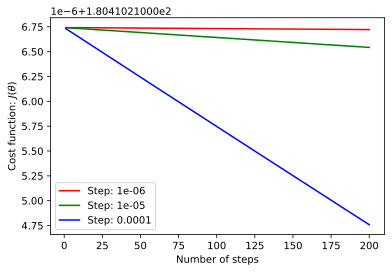

In [12]:
from sklearn.preprocessing import normalize

def gradient_descent(h, cost_fun, theta, x, y, alpha, max_step = 200):
    current_cost = cost_fun(h, theta, x, y)
    log = []  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    counter = 0
    while counter < max_step:
        new_theta = [
            theta[0] -
            alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1] - alpha / float(m) * sum(
                (h(theta, x[i]) - y[i]) * x[i] for i in range(m))
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if current_cost > prev_cost:
            print("Zbyt duża długość kroku!")
            continue
        log.append(current_cost)
        counter += 1
    return log

step_lens = [.000001, .00001, .0001]
fig, ax = plt.subplots()

for step_len, color in zip(step_lens, ["red", "green", "blue"]):
    values = gradient_descent(h, J, best_theta, x, y, alpha=step_len)
    ax.plot(list(range(1, 201)), values, c=color, label = f"Step: {step_len}")

ax.set_xlabel("Number of steps")
ax.set_ylabel(r"Cost function: $J(\theta)$")
ax.legend()

# 24.03.2022 Zadanie 2

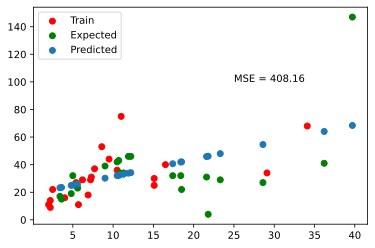

In [13]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost,
            theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] -
            alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1] - alpha / float(m) * sum(
                (h(theta, x[i]) - y[i]) * x[i] for i in range(m))
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if current_cost > prev_cost:
            print("Zbyt duża długość kroku!")
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        log.append([current_cost, theta])
    return theta, log

def mse(expected, predicted):
    """Błąd średniokwadratowy"""
    m = len(expected)
    if len(predicted) != m:
        raise Exception('Wektory mają różne długości!')
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i])**2 for i in range(m))

x_train, x_test = x[:len(x)//2], x[len(x)//2:]
y_train, y_test = y[:len(x)//2], y[len(y)//2:]

best_theta, log = gradient_descent(h,
                                   J, [0.0, 0.0],
                                   x_train,
                                   y_train,
                                   alpha=0.001,
                                   eps=0.0000001)
fig, ax = plt.subplots()

ax.scatter(x_train, y_train, c="red", label = "Train")
ax.scatter(x_test, y_test, c="green", label = "Expected")
ax.scatter(x_test, h(best_theta, x_test), label = "Predicted")
ax.text(25, 100, f"MSE = {mse(y_test, h(best_theta, y_test)) :.2f}")
ax.legend()